The NBA Draft, around since 1947, has provided a way for teams to add college and international players to supplement their rosters. The current format of two rounds has been in place since 1989 and players have not been allowed to be drafted directly from high school since 2006. Each team is alloted one draft pick in each round and they are also allowed to trade those picks(with certain rescrictions). 

The purpose of this analysis is to look at the picks in the second round. We are looking for identifiable commonalities among picks that can be considered "successful". The dataset consists of every second round pick selected between 2006 and 2019 for a total of 420 draft selections. 

We start by importing our dataset, a CSV file with NBA Draft data from Stathead, aka Basketball Reference. We also import Pandas and convert the CSV file into a Pandas DataFrame. The head is printed so the formatting of our data is known.

In [133]:
import pandas as pd 
draft = pd.read_csv('/Users/rickeydidio/Desktop/Development/NBA/Second_Round_Picks.csv', header=0)
draft.head()

,Rk,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,College,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
0,1,NBA,2,31,POR,James White\whiteja02,23.256,G-F,us,Cincinnati,...,1.0,0.5,0.3,0.1,0.438,0.482,0.340,0.676,0.8,0.062
1,2,NBA,2,32,HOU,Steve Novak\novakst01,23.021,F,us,Marquette,...,1.3,0.3,0.2,0.1,0.437,0.463,0.430,0.877,14.5,0.123
2,3,NBA,2,33,ATL,Solomon Jones\jonesso01,21.352,F,us,South Florida,...,2.3,0.4,0.2,0.5,0.467,0.472,0.111,0.717,5.0,0.078
3,4,NBA,2,34,LAC,Paul Davis\davispa01,21.347,C,us,Michigan State,...,1.9,0.4,0.3,0.2,0.402,0.404,0.000,0.732,0.5,0.035
4,5,NBA,2,35,TOR,P.J. Tucker\tuckepj01,21.059,F,us,Texas,...,5.7,1.4,1.2,0.3,0.420,0.474,0.358,0.749,34.7,0.083


The columns are printed so know what data is available to analyze. 

In [134]:
print(draft.columns)

Index(['Rk', 'Lg', 'Rd', 'Pk', 'Tm', 'Player', 'Age', 'Pos', 'Born', 'College',
       'From', 'To', 'Year', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK',
       'FG%', '2P%', '3P%', 'FT%', 'WS', 'WS/48'],
      dtype='object')


Looking at the columns, everything is pretty self explanatory but for the purpose of make things even more clear, the games column "G" is renamed to "Games". The info function is used to view a summary of the dataframe, which also provides us a few insights right away.

First, we have 318 players with a college listed. Given that American players are required to one year removed from their high school graduation, we are left with 102 players(24%) who presumably were internationally drafted. We can also see that 317 players(75%) drafted in the second round have played in at least one NBA game. 

In [135]:
draft.rename(columns={"G": "Games"}, inplace=True)
draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       420 non-null    int64  
 1   Lg       420 non-null    object 
 2   Rd       420 non-null    int64  
 3   Pk       420 non-null    int64  
 4   Tm       420 non-null    object 
 5   Player   420 non-null    object 
 6   Age      396 non-null    float64
 7   Pos      396 non-null    object 
 8   Born     396 non-null    object 
 9   College  318 non-null    object 
 10  From     317 non-null    float64
 11  To       317 non-null    float64
 12  Year     420 non-null    int64  
 13  Games    317 non-null    float64
 14  MP       317 non-null    float64
 15  PTS      317 non-null    float64
 16  TRB      317 non-null    float64
 17  AST      317 non-null    float64
 18  STL      317 non-null    float64
 19  BLK      317 non-null    float64
 20  FG%      314 non-null    float64
 21  2P%      312 non

To introduce some visualization to the dataframe, MatPlotLib is imported.

In [136]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

A MatPlotLib histogram is used to show the distribution of Games Played by the players. 

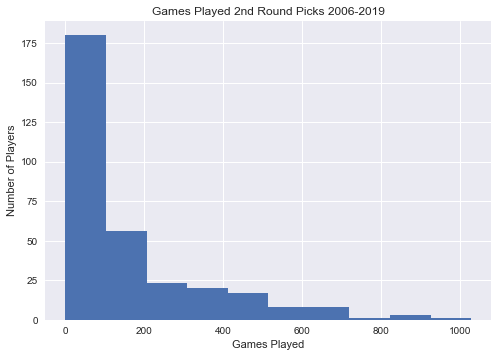

In [137]:
plt.hist(draft["Games"])
plt.title("Games Played 2nd Round Picks 2006-2019")
plt.xlabel("Games Played")
plt.ylabel("Number of Players")
plt.show()

NumPy is imported and the dataframe is funneled down to just include those previously mentioned 317 players who have played in at least 1 NBA game. 

In [138]:
import numpy as np
draft[draft.Games > 0] 
#played_games = draft[draft.Games > 0]
#print(played_games)

,Rk,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,College,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
0,1,NBA,2,31,POR,James White\whiteja02,23.256,G-F,us,Cincinnati,...,1.0,0.5,0.3,0.1,0.438,0.482,0.340,0.676,0.8,0.062
1,2,NBA,2,32,HOU,Steve Novak\novakst01,23.021,F,us,Marquette,...,1.3,0.3,0.2,0.1,0.437,0.463,0.430,0.877,14.5,0.123
2,3,NBA,2,33,ATL,Solomon Jones\jonesso01,21.352,F,us,South Florida,...,2.3,0.4,0.2,0.5,0.467,0.472,0.111,0.717,5.0,0.078
3,4,NBA,2,34,LAC,Paul Davis\davispa01,21.347,C,us,Michigan State,...,1.9,0.4,0.3,0.2,0.402,0.404,0.000,0.732,0.5,0.035
4,5,NBA,2,35,TOR,P.J. Tucker\tuckepj01,21.059,F,us,Texas,...,5.7,1.4,1.2,0.3,0.420,0.474,0.358,0.749,34.7,0.083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,NBA,2,54,PHI,Marial Shayok\shayoma01,23.335,G,ca,Iowa State,...,1.8,0.3,0.0,0.3,0.250,0.167,0.333,0.750,-0.1,-0.130
414,415,NBA,2,55,NYK,Kyle Guy\guyky01,21.318,G,us,Virginia,...,0.8,0.8,0.2,0.0,0.320,0.455,0.214,0.875,0.0,-0.017
416,417,NBA,2,57,NOP,Jordan Bone\bonejo01,21.232,G,us,Tennessee,...,1.2,1.1,0.1,0.0,0.378,0.500,0.286,NaN,0.1,0.019
417,418,NBA,2,58,GSW,Miye Oni\onimi01,21.325,G,us,Yale,...,1.7,0.3,0.2,0.2,0.378,0.350,0.389,0.818,0.6,0.082


Next, the players are sorted by Win Shares("WS"). Win Shares is a metric that statisticians including notable baseball statistician Bill James created to "estimate a player's contribution to actual games won." The dataframe is sorted by total Win Shares, highest to lowest. 

On inital glance, the top 5 players are players you would not be surprised to see given their impact and longevity in the league. Paul Millsap, DeAndre Jordan, Marc Gasol, Nikola Jokic, and Goran Dragic.

In [139]:
draft.sort_values('WS', ascending=False)

,Rk,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,College,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
16,17,NBA,2,47,UTA,Paul Millsap\millspa01,21.143,F,us,Louisiana Tech,...,7.3,2.2,1.3,1.0,0.491,0.514,0.346,0.736,94.0,0.152
64,65,NBA,2,35,LAC,DeAndre Jordan\jordade01,19.345,C,us,Texas A&M,...,10.7,1.0,0.6,1.6,0.673,0.675,0.083,0.474,91.5,0.174
47,48,NBA,2,48,LAL,Marc Gasol\gasolma01,22.155,C,es,NaN,...,7.5,3.4,0.9,1.4,0.480,0.498,0.355,0.777,84.4,0.143
250,251,NBA,2,41,DEN,Nikola Jokić\jokicni01,19.132,C-F,rs,NaN,...,9.8,5.8,1.2,0.7,0.531,0.580,0.349,0.831,58.5,0.223
74,75,NBA,2,45,SAS,Goran Dragić\dragigo01,22.057,G,si,NaN,...,3.1,4.8,1.0,0.2,0.463,0.507,0.362,0.766,55.4,0.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,381,NBA,2,51,NOP,Tony Carr\carrto01,20.258,G,us,Penn State,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,385,NBA,2,55,CHO,Arnoldas Kulboka\kulboar01,20.173,F,lt,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,395,NBA,2,35,ATL,Marcos Louzada Silva\louzama01,20.138,G,br,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,416,NBA,2,56,LAC,Jaylen Hands\handsja01,20.133,G,us,UCLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next we take a look at players with Win Shares greater than or equal to 1. 1 doesn't really have any significance other than not being 0. Since Win Shares are awarded on a fractional basis, it is possible for any of the players in the dataframe to have between 0 and 1 total Win Share in their career. 
We have a total of 152 players(36% of total drafted) who have been credited with at least 1 Win Share.  

In [140]:
win_shares = draft[draft['WS'] >= 1]
print(win_shares)

      Rk   Lg  Rd  Pk   Tm                         Player     Age  Pos Born  \
1      2  NBA   2  32  HOU          Steve Novak\novakst01  23.021    F   us   
2      3  NBA   2  33  ATL        Solomon Jones\jonesso01  21.352    F   us   
4      5  NBA   2  35  TOR          P.J. Tucker\tuckepj01  21.059    F   us   
5      6  NBA   2  36  MIN          Craig Smith\smithcr01  22.236    F   us   
6      7  NBA   2  37  MIN          Bobby Jones\jonesbo02  22.176    F   us   
..   ...  ...  ..  ..  ...                            ...     ...  ...  ...   
400  401  NBA   2  41  GSW        Eric Paschall\pascher01  22.233    F   us   
402  403  NBA   2  43  MIN        Jaylen Nowell\nowelja01  19.351    G   us   
404  405  NBA   2  45  DET           Isaiah Roby\robyis01  21.142    F   us   
405  406  NBA   2  46  ORL  Talen Horton-Tucker\hortota01  18.211  G-F   us   
407  408  NBA   2  48  LAC          Terance Mann\mannte01  22.250  G-F   us   

            College  ...  TRB  AST  STL  BLK    FG%

Seaborn is imported for an additional visualization tool. Next, we take a look at how minutes played per game correlates to Win Shares per 48 minutes. Upon further review, there doesn't appear to be any correlation between the two. 

[Text(0.5, 0, 'Minutes Played Per Game'),
 Text(0, 0.5, 'WinShares per 48 Minutes'),
 Text(0.5, 1.0, 'Correlation of Minutes/Game and WinShares/48 with Linear Regression Model Fit')]

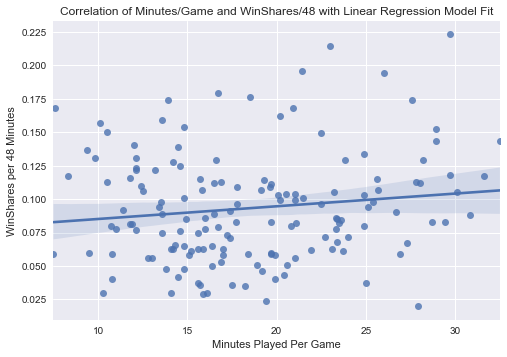

In [141]:
import seaborn as sns
correlation = sns.regplot(x='MP', y='WS/48', data=win_shares)
correlation.set(xlabel='Minutes Played Per Game',
                ylabel='WinShares per 48 Minutes',
                title='Correlation of Minutes/Game and WinShares/48 with Linear Regression Model Fit')



Let's see if we can approach this from a slightly different angle. We will keep Minutes Played per Game("MP") but instead of using Winshare per 48 minutes, let's see if there's a correlation using total games("Games") divided by total Win Shares("WS"). We are going to start by creating a new column in the dataframe.

In [142]:
win_shares["WS Per Game"] = win_shares["WS"] / win_shares["Games"]
win_shares.head()

<ipython-input-142-be917918b964>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_shares["WS Per Game"] = win_shares["WS"] / win_shares["Games"]


,Rk,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,College,...,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48,WS Per Game
1,2,NBA,2,32,HOU,Steve Novak\novakst01,23.021,F,us,Marquette,...,0.3,0.2,0.1,0.437,0.463,0.430,0.877,14.5,0.123,0.031049
2,3,NBA,2,33,ATL,Solomon Jones\jonesso01,21.352,F,us,South Florida,...,0.4,0.2,0.5,0.467,0.472,0.111,0.717,5.0,0.078,0.017794
4,5,NBA,2,35,TOR,P.J. Tucker\tuckepj01,21.059,F,us,Texas,...,1.4,1.2,0.3,0.420,0.474,0.358,0.749,34.7,0.083,0.050509
5,6,NBA,2,36,MIN,Craig Smith\smithcr01,22.236,F,us,Boston College,...,0.8,0.5,0.2,0.553,0.560,0.037,0.661,16.0,0.113,0.039702
6,7,NBA,2,37,MIN,Bobby Jones\jonesbo02,22.176,F,us,Washington,...,0.5,0.3,0.0,0.442,0.491,0.306,0.685,1.1,0.060,0.012088


[Text(0.5, 0, 'Minutes Played Per Game'),
 Text(0, 0.5, 'WinShares Per Game'),
 Text(0.5, 1.0, 'Correlation of Minutes/Game and WinShares/Game with Linear Regression Model Fit')]

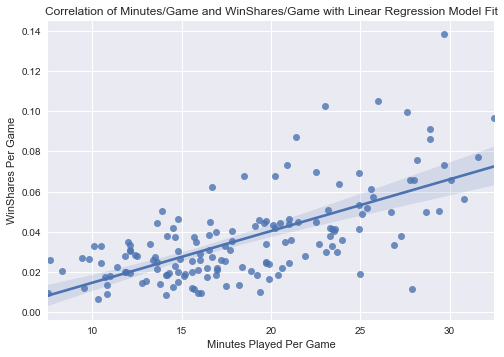

In [143]:
correlation2 = sns.regplot(x='MP', y='WS Per Game', data=win_shares)
correlation2.set(xlabel='Minutes Played Per Game',
                ylabel='WinShares Per Game',
                title='Correlation of Minutes/Game and WinShares/Game with Linear Regression Model Fit')


Now we can start to see a correlation. The more minutes a player has per game will lead to more WinShares Per Game. In the next step, let's sort the WinShares per Game and see who comes up near the top.

In [144]:
win_shares.sort_values('WS Per Game', ascending=False)

,Rk,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,College,...,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48,WS Per Game
250,251,NBA,2,41,DEN,Nikola Jokić\jokicni01,19.132,C-F,rs,NaN,...,5.8,1.2,0.7,0.531,0.580,0.349,0.831,58.5,0.223,0.138298
122,123,NBA,2,33,SAC,Hassan Whiteside\whiteha01,21.016,C,us,Marshall,...,0.7,0.6,2.4,0.581,0.583,0.308,0.604,45.9,0.194,0.105275
365,366,NBA,2,36,NYK,Mitchell Robinson\robinmi01,20.086,C,us,NaN,...,0.6,0.9,2.1,0.706,0.706,NaN,0.565,15.9,0.214,0.102581
64,65,NBA,2,35,LAC,DeAndre Jordan\jordade01,19.345,C,us,Texas A&M,...,1.0,0.6,1.6,0.673,0.675,0.083,0.474,91.5,0.174,0.099891
47,48,NBA,2,48,LAL,Marc Gasol\gasolma01,22.155,C,es,NaN,...,3.4,0.9,1.4,0.480,0.498,0.355,0.777,84.4,0.143,0.096568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,341,NBA,2,41,ATL,Tyler Dorsey\dorsety01,21.130,G,us,Oregon,...,1.3,0.3,0.1,0.389,0.429,0.350,0.669,1.0,0.030,0.009615
81,82,NBA,2,52,MIA,Darnell Jackson\jacksda01,22.237,F,us,Kansas,...,0.2,0.2,0.1,0.449,0.463,0.235,0.644,1.3,0.059,0.009420
172,173,NBA,2,53,ORL,DeAndre Liggins\liggide01,23.089,G,us,Kentucky,...,0.7,0.6,0.2,0.402,0.432,0.352,0.549,1.6,0.040,0.009040
241,242,NBA,2,32,PHI,K.J. McDaniels\mcdankj01,21.142,G-F,us,Clemson,...,0.6,0.5,0.6,0.412,0.479,0.290,0.776,1.3,0.030,0.008784


Once again we see a few familiar and expected names(Nikola Jokic, DeAndre Jordan, and Marc Gasol) that we previously saw when ranking total Win Shares and a few other names of notable players such as Hassan Whiteside and Mitchell Robinson. Another thing to note is that all of these top 5 players in Win Shares Per Game are listed as Center for their position. This brings up something to look at... which position has the highest Win shares Per Game out of this dataset? We will come back to this later.

To obtain a relevant sample size, we will take a look at Average Win shares per game, for players who have played a minimum 41 games(half a season).

In [146]:
half_season = win_shares[win_shares['Games'] >= 41]
print(half_season)

      Rk   Lg  Rd  Pk   Tm                         Player     Age  Pos Born  \
1      2  NBA   2  32  HOU          Steve Novak\novakst01  23.021    F   us   
2      3  NBA   2  33  ATL        Solomon Jones\jonesso01  21.352    F   us   
4      5  NBA   2  35  TOR          P.J. Tucker\tuckepj01  21.059    F   us   
5      6  NBA   2  36  MIN          Craig Smith\smithcr01  22.236    F   us   
6      7  NBA   2  37  MIN          Bobby Jones\jonesbo02  22.176    F   us   
..   ...  ...  ..  ..  ...                            ...     ...  ...  ...   
397  398  NBA   2  38  CHI       Daniel Gafford\gaffoda01  20.267    F   us   
400  401  NBA   2  41  GSW        Eric Paschall\pascher01  22.233    F   us   
402  403  NBA   2  43  MIN        Jaylen Nowell\nowelja01  19.351    G   us   
405  406  NBA   2  46  ORL  Talen Horton-Tucker\hortota01  18.211  G-F   us   
407  408  NBA   2  48  LAC          Terance Mann\mannte01  22.250  G-F   us   

            College  ...  AST  STL  BLK    FG%    2

This returns 150 rows, which is comparable to the prior "win_shares" dataset(152 rows) that filtered players with at least 1 winshare.

Let's revisit a question that was recently brought up about which position has the highest Win Shares per Game out of the dataset. Beginning with finding all of the unique values in the position("Pos") column.

In [150]:
print(half_season.Pos.unique())
print(half_season.Pos.nunique())

['F' 'G' 'C' 'F-C' 'G-F' 'F-G' 'C-F']
7


So we can see there are 7 unique values. In basketball we know that there are 3 main positions: guards('G'), forwards('F'), and centers('C'). There are also combo positions such as guard-forward('G-F') and forward-center('F-C') for players who have the ability to play multiple positions. That should leave us with 5 positions but our dataset turns up 7. The reason being is that both F-C and C-F are listed. The same for G-F and F-G. When we break players down by positions we will combine these variations to leave 5 positions.

In [160]:
half_season_guards = win_shares[win_shares['Pos'] == 'G']
half_season_forwards = win_shares[win_shares['Pos'] == 'F']
half_season_centers = win_shares[win_shares['Pos'] == 'F']
half_season_guard_forward = win_shares[(win_shares['Pos'] == 'G-F') | (win_shares['Pos'] =='F-G')]
half_season_forward_center = win_shares[(win_shares['Pos'] == 'F-C') | (win_shares['Pos'] =='C-F')]
